---
title: "Gradient descent for linear regression"
format: html
---

In [4]:
using DataFrames
import CSV
using CairoMakie
using Statistics
CairoMakie.activate!(; px_per_unit = 2)

┌ Warning: The call to compilecache failed to create a usable precompiled cache file for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
│   exception = ErrorException("Required dependency PrettyTables [08abe8d2-0d0c-5749-adfa-8a2ac140af0d] failed to load from a cache file.")
└ @ Base loading.jl:1818


In [16]:
# Load the data
rangifer = DataFrame(CSV.File("../data/gradientdescent/climate.csv"))
describe(rangifer)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,latitude,61.7597,55.4124,62.2957,64.904,0,Float64
2,longitude,10.353,4.74569,9.92903,19.6957,0,Float64
3,presence,0.800337,false,1.0,true,0,Bool
4,bio1,10.5582,-42,5.0,84,0,Int64
5,bio2,58.3396,22,59.0,71,0,Int64
6,bio3,227.826,145,230.0,258,0,Int64
7,bio4,6886.12,3930,6910.0,8934,0,Int64
8,bio12,795.236,297,640.0,3659,0,Int64


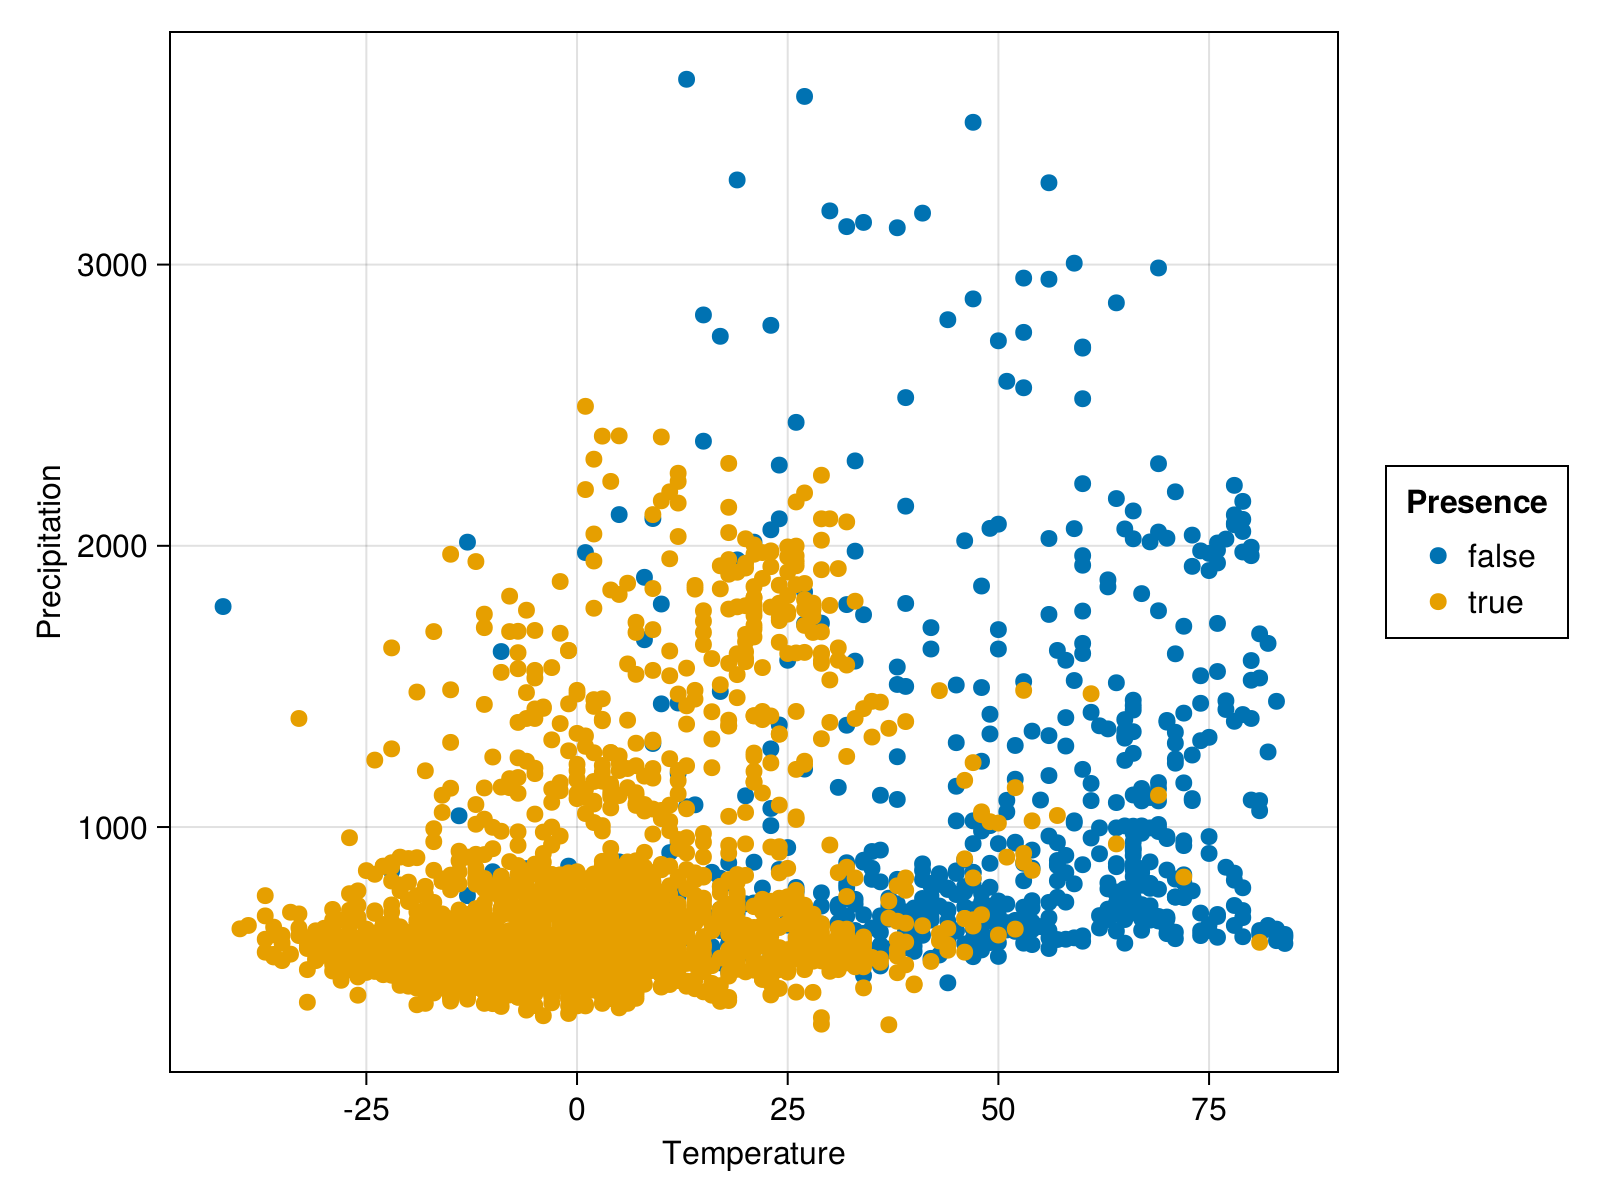

In [27]:
using AlgebraOfGraphics
rangifer_var = AlgebraOfGraphics.data(rangifer) * mapping(:bio1 => :Temperature, :bio12 => :Precipitation) * mapping(color=:presence => :Presence)
draw(rangifer_var)

In [33]:
# Split between training and testing
training_inclusion = rand(size(data, 1)) .< 0.8
training = rangifer[findall(training_inclusion),:]
testing = rangifer[findall(.!training_inclusion),:]

Row,latitude,longitude,presence,bio1,bio2,bio3,bio4,bio12
,Float64,Float64,Bool,Int64,Int64,Int64,Int64,Int64
1,59.2957,6.51236,true,29,54,238,6023,2251
2,59.2624,6.52069,true,29,54,239,6012,2020
3,59.479,6.62069,true,25,56,239,6170,1961
4,59.4707,6.64569,true,18,56,240,6167,2047
5,61.0207,6.66236,true,3,56,233,6474,1219
6,59.4874,6.69569,true,21,56,240,6221,2003
7,59.529,6.71236,true,10,57,241,6215,2387
8,59.504,6.72903,true,24,57,240,6261,1860
9,59.4374,6.73736,true,9,57,242,6203,2111


In [35]:
# Lin Reg machinery
using Zygote
L2(ŷ, x, f, p...) = sum((ŷ .- f(x, p...)) .^ 2.0) / length(x)
∇L(ŷ, x, f, p...) = gradient((p...) -> L2(ŷ, x, f, p...), p...)
η = 1e-3

0.001

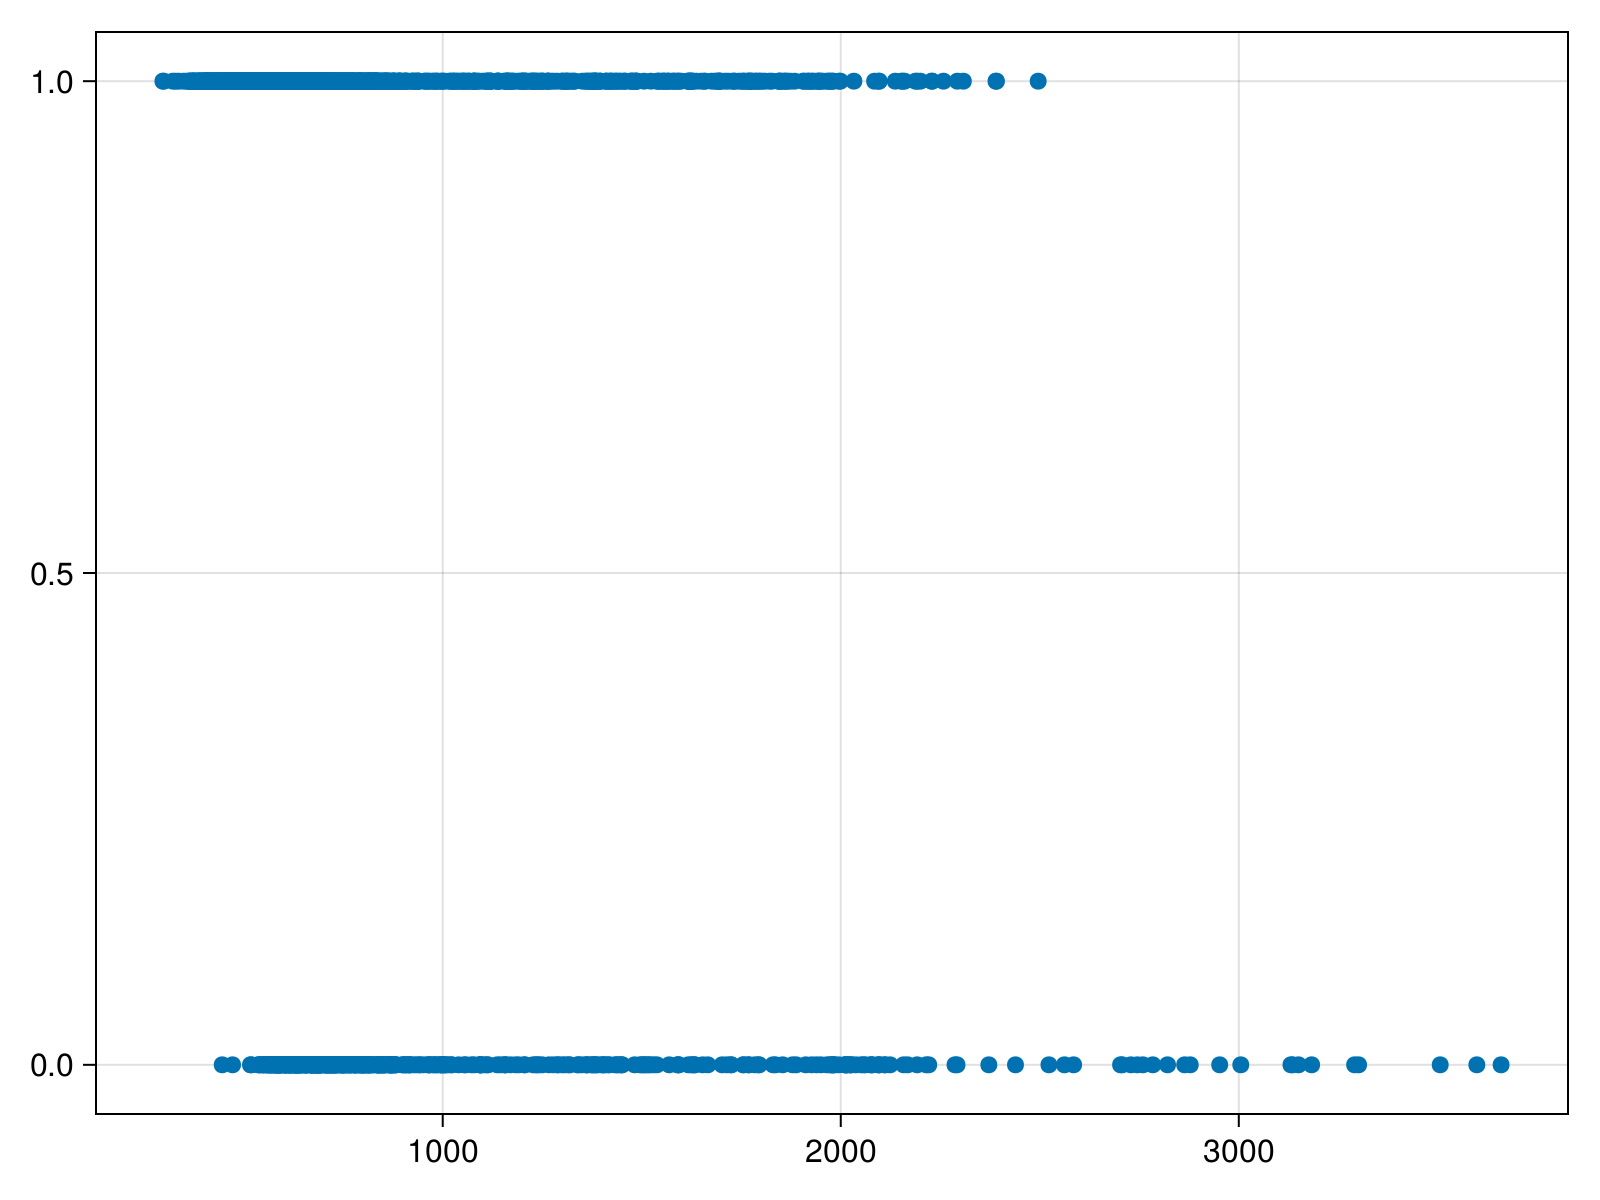

In [41]:
# Little plot to check that it's working
scatter(training.bio12, training.presence)